# Step 0: Import Libraries

Import all the required Tensorflow and Keras libraries

In [ ]:
!pip install tensorflow


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers 

import os as os
import numpy as np
import matplotlib.pyplot as plt

# Dataset sizes
num_train_images = 23000
num_validation_images = 2000
num_test_images = 399

# Model Hyperparameters
input_image_size = 64
batch_size = 32
num_training_epochs = 40
learning_rate = 0.001
l2_lambda = 0.01

# Parameters derived from hyperparameters
training_steps_per_epoch = int(num_train_images/batch_size)
validation_steps_per_epoch = int(num_validation_images/batch_size)
testing_steps_per_epoch = num_test_images/batch_size

%matplotlib inline

 # Step 1: Design the CNN architecture. After designing the architecture, print it in iPython Notebook. 


In [3]:

model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape=(64, 64, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))

model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=learning_rate)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        2336      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)         

# Step 2: Load Images and Prepare the Network for training

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator() for the training data.  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


# Create the ImageDataGenerator() for the validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

training_set_folder = "C:\\Users\\ducth\\cmpt 487 asm\\asm6\\train" 
validation_set_folder = "C:\\Users\\ducth\\cmpt 487 asm\\asm6\\valid"  

training_set = train_datagen.flow_from_directory(
    training_set_folder,
    target_size=(input_image_size, input_image_size),
    batch_size=batch_size,
    class_mode='binary'
)

validation_set = validation_datagen.flow_from_directory(
    validation_set_folder,
    target_size=(input_image_size, input_image_size),
    batch_size=batch_size,
    class_mode='binary'
)



Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Step 3: Train the CNN Network

In [5]:
# Train the CNN using the fit() function of your CNN. 
history = model.fit(
    training_set,
    steps_per_epoch=training_steps_per_epoch,
    epochs=num_training_epochs,
    validation_data=validation_set,
    validation_steps=validation_steps_per_epoch,
    verbose=1
)



Epoch 1/40


718/718 [==============================] - 88s 120ms/step - loss: 0.7577 - accuracy: 0.5669 - val_loss: 0.6410 - val_accuracy: 0.6321
Epoch 2/40
718/718 [==============================] - 80s 111ms/step - loss: 0.6031 - accuracy: 0.6824 - val_loss: 0.5826 - val_accuracy: 0.7137
Epoch 3/40
718/718 [==============================] - 75s 105ms/step - loss: 0.5353 - accuracy: 0.7353 - val_loss: 0.5125 - val_accuracy: 0.7555
Epoch 4/40
718/718 [==============================] - 93s 130ms/step - loss: 0.4931 - accuracy: 0.7707 - val_loss: 0.5524 - val_accuracy: 0.7268
Epoch 5/40
718/718 [==============================] - 85s 119ms/step - loss: 0.4586 - accuracy: 0.7898 - val_loss: 0.4855 - val_accuracy: 0.7601
Epoch 6/40
718/718 [==============================] - 89s 124ms/step - loss: 0.4309 - accuracy: 0.8051 - val_loss: 0.4470 - val_accuracy: 0.7893
Epoch 7/40
718/718 [==============================] - 84s 117ms/step - loss: 0.4026 - accuracy: 0.8208 - val_loss: 0.4232 - val_

# Step 4: Save the model and weights for prediction

In [6]:
model.save('Cat-Dog-64x64-4layer-maxpooling.h5')
print("Saved model to disk")

Saved model to disk


C:\Users\ducth\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Step 5: Plot the training and Validation Loss/Accuracy

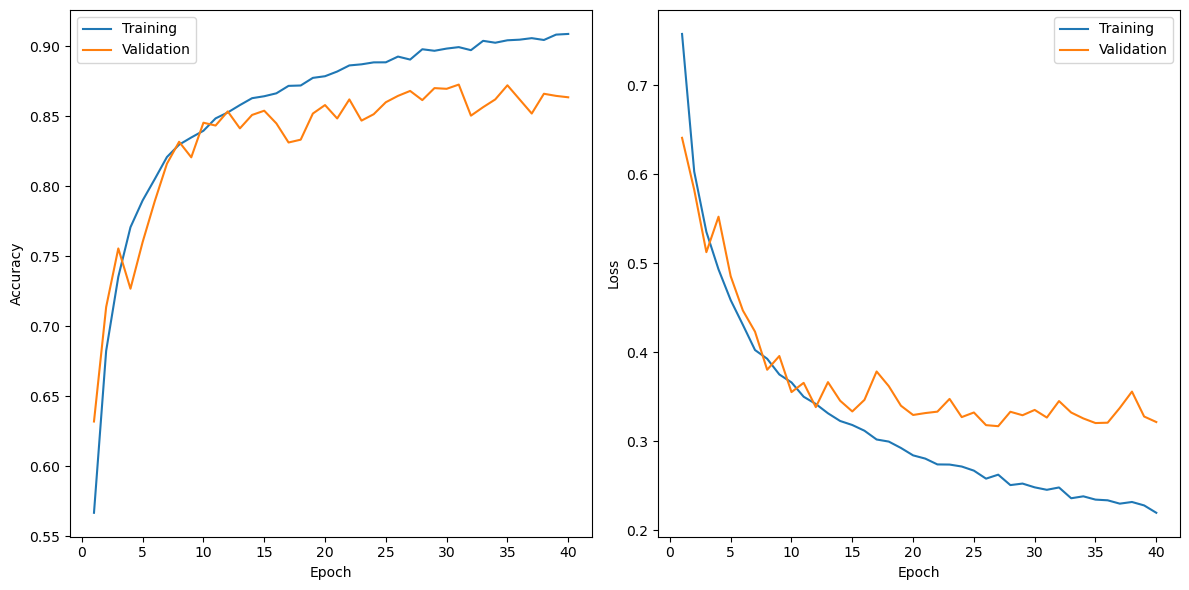

In [9]:
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_training_epochs + 1), training_accuracy, label='Training')
plt.plot(range(1, num_training_epochs + 1), validation_accuracy, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_training_epochs + 1), training_loss, label='Training')
plt.plot(range(1, num_training_epochs + 1), validation_loss, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
"""
There is a noticeable gap between the training accuracy and validation
accuracy, and a similar gap between training loss and validation loss.
This suggests that the model may be overfitting to the training data
"""

"""
Overfitting occurs when a model learns the training data too well,
including its noise and specific features that do not generalize well
to unseen data. The gap between training and validation metrics 
indicates that the model is performing significantly better on the 
training data compared to the validation data, suggesting overfitting.
"""

"""
 It seems that around epoch 15, both training and validation accuracy
 start to plateau, and the validation loss reaches a minimum. After
 this point, there is not much improvement in validation accuracy, 
 and the risk of overfitting increases. Therefore, stopping training 
 around epoch 15 could likely provide a model with good generalization
 performance on a test dataset.
"""

# Step 6: Predict Doc/Cat using the Trained Model

In [8]:
model = load_model('Cat-Dog-64x64-4layer-maxpooling.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\ducth\\cmpt 487 asm\\asm6\\test1",  
    target_size=(input_image_size, input_image_size), 
    batch_size=batch_size,
    class_mode=None,  
    shuffle=False  
)

probabilities = model.predict_generator(test_generator)

y_pred = np.squeeze((probabilities > 0.5).astype(int))

accuracy = np.sum(y_pred == test_generator.classes) / len(test_generator.classes)
accuracy_percentage = (accuracy * 100)

print(f'The classification rate is {accuracy_percentage:.2f}%')
                                        

Found 399 images belonging to 2 classes.


C:\Users\ducth\AppData\Local\Temp\ipykernel_10932\2285415168.py:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(test_generator)


The classification rate is 85.21%
